# Deep Learning Model
We are aiming to predict the Lip_norm parameter based on the binary positions and full embedding of a peptide.

## Dataset preparation
Read the dataframed with the embeddings and binary positions, and then format them.

In [1]:
import json
import pickle
import pandas as pd

def load_and_process_embedding(file_path):
    with open(file_path, 'rb') as file:
        embeddings = pickle.load(file)
    embeddings = pd.DataFrame(embeddings)
    embeddings.set_index('Uniprot_ID', inplace=True)
    embeddings = embeddings.drop(columns=['full_sequence'])
    # return embeddings.sample(n=150, random_state=42)
    return embeddings

embeddings = pd.DataFrame()

embedding_files = [
    'data/embeddings_test_1-003.pkl',
    # 'data/embeddings_test_2-004.pkl',
    # 'data/embeddings_test_3-002.pkl',
    # 'data/embeddings_test_4-001.pkl'
]

# Process each file and concatenate
for file_path in embedding_files:
    current_embeddings = load_and_process_embedding(file_path)
    embeddings = pd.concat([embeddings, current_embeddings])

In [2]:
embeddings

,full_embedding
Uniprot_ID,
P15703,"[[0.10351670533418655, -0.04619598016142845, 0..."
P38174,"[[0.017678968608379364, -0.011685207486152649,..."
P26637,"[[0.04360557720065117, 0.039450906217098236, 0..."
P06169,"[[0.06486686319112778, -0.018988797441124916, ..."
P00359,"[[0.05060335993766785, -0.002109627239406109, ..."
...,...
P40991,"[[0.05226866900920868, -0.04464501142501831, 0..."
P53633,"[[0.044984687119722366, -0.01916404627263546, ..."
Q01217,"[[0.08891955018043518, -0.039793942123651505, ..."


In [3]:
import numpy as np

# Creating trimmed embeddings
trimmed_embeddings = [np.array(embedding)[1:-1, :] for embedding in embeddings['full_embedding']]
trimmed_embeddings_df = pd.DataFrame({'embeddings': trimmed_embeddings}, index=embeddings.index)

In [4]:
trimmed_embeddings_df

,embeddings
Uniprot_ID,
P15703,"[[-0.0014747204259037971, -0.04175397753715515..."
P38174,"[[0.09441959857940674, 0.05087737366557121, -0..."
P26637,"[[0.07177527993917465, 0.05565423518419266, 0...."
P06169,"[[0.05485401302576065, 0.05323461815714836, -0..."
P00359,"[[0.0364735871553421, -0.02804701030254364, -0..."
...,...
P40991,"[[0.10278788208961487, 0.003414804581552744, -..."
P53633,"[[0.05683088302612305, -0.03139161318540573, -..."
Q01217,"[[0.13987456262111664, -0.090286985039711, -0...."


In [5]:
trimmed_size_embeddings_df = trimmed_embeddings_df[trimmed_embeddings_df['embeddings'].apply(lambda x: x.shape[0]) < 1000]

In [6]:
trimmed_size_embeddings_df

,embeddings
Uniprot_ID,
P15703,"[[-0.0014747204259037971, -0.04175397753715515..."
P38174,"[[0.09441959857940674, 0.05087737366557121, -0..."
P06169,"[[0.05485401302576065, 0.05323461815714836, -0..."
P00359,"[[0.0364735871553421, -0.02804701030254364, -0..."
P37292,"[[0.1292525678873062, 0.10085765272378922, -0...."
...,...
P40991,"[[0.10278788208961487, 0.003414804581552744, -..."
P53633,"[[0.05683088302612305, -0.03139161318540573, -..."
Q01217,"[[0.13987456262111664, -0.090286985039711, -0...."


In [7]:
max_length = 1000

# Padding embeddings
padded_embeddings = [np.pad(embedding, ((0, max_length - embedding.shape[0]), (0, 0)), mode='constant', constant_values=0)
                     for embedding in trimmed_size_embeddings_df['embeddings']]

In [8]:
padded_embeddings_df = pd.DataFrame({'embeddings': padded_embeddings}, index=trimmed_size_embeddings_df.index)

In [9]:
# Get the dataset
df = pd.read_csv('data/OsmoticStress_with_binary_positions_padded.csv')
df['Binary_Positions'] = df['Binary_Positions'].apply(json.loads)
df['Padded_Binary_Positions'] = df['Padded_Binary_Positions'].apply(json.loads)
df.drop(columns=['full_sequence', 'Peptide_sequence', "Binary_Positions"], inplace=True)
#df["full_sequence"]= df["full_sequence"].astype(str)
df.set_index('Uniprot_ID', inplace=True)

df

,Log2FC(LiP_norm),Padded_Binary_Positions
Uniprot_ID,,
P15703,-2.176707,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,0.285029,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,-0.498240,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,0.348193,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P15703,-0.434615,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
P38887,-0.008441,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
P53093,0.006678,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
Q04772,-0.015149,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ..."


In [10]:
dataset = df.merge(padded_embeddings_df, left_index=True, right_index=True)

In [11]:
# We can see that we have only the columns: 'Lip_norm', 'Binary Position', 'Embeddings'
dataset.head()

,Log2FC(LiP_norm),Padded_Binary_Positions,embeddings
Uniprot_ID,,,
O13516,4.378006,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,3.345066,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,3.458429,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,3.607978,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,4.070368,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."


In [12]:
import re

# Both columns are strings, we need to convert them to lists of integers so we can use them later
def convert_to_list(number_string):
    cleaned_string = re.sub(r"[^\d,\s]", "", number_string)
    return list(map(int, cleaned_string.split(',')))

#dataset['Binary_Positions'] = dataset['Binary_Positions'].apply(convert_to_list)

In [13]:
# def matrix_shape_lists(x):
#    return len(x), len(x[0])
# 
# dataset['Binary_Positions_shape'] = dataset['Binary_Positions'].apply(len)
# dataset['full_embedding_shape'] = dataset['embeddings'].apply(matrix_shape_lists)

In [14]:
dataset

,Log2FC(LiP_norm),Padded_Binary_Positions,embeddings
Uniprot_ID,,,
O13516,4.378006,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,3.345066,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,3.458429,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,3.607978,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
O13516,4.070368,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.011881312355399132, -0.09332677721977234, ..."
...,...,...,...
Q6Q547,-0.050568,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.03893417492508888, -0.04581452161073685, -..."
Q6Q547,0.543480,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...","[[0.03893417492508888, -0.04581452161073685, -..."
Q6Q547,-0.153268,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0.03893417492508888, -0.04581452161073685, -..."


In [15]:
# dataset = dataset[:7000]

dataset = dataset.sample(n=7000, random_state=42)

In [16]:
import torch
import numpy as np

# Assuming 'dataset' is a dictionary-like object with data
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create tensors directly on the GPU, ensure you handle device availability
embeddings_tensor = torch.tensor(np.array(dataset['embeddings'].tolist(), dtype=np.float16), device=device)
binary_positions_tensor = torch.tensor(np.array(dataset['Padded_Binary_Positions'].tolist(), dtype=np.float16), device=device)

In [17]:
print(embeddings_tensor.shape)
print(binary_positions_tensor.shape)

torch.Size([7000, 1000, 1280])
torch.Size([7000, 1000])


In [18]:
binary_positions_tensor = binary_positions_tensor.unsqueeze(-1)

In [19]:
# Use in-place operations to save memory
X = embeddings_tensor + binary_positions_tensor

In [20]:
# Another tensor, also directly to GPU
y = torch.tensor(np.array(dataset['Log2FC(LiP_norm)'].tolist(), dtype=np.float16), device=device)

# Clear memory if not needed anymore
del binary_positions_tensor  # Free this if no longer needed
del embeddings_tensor
torch.cuda.empty_cache()  # Help PyTorch reclaim any unreferenced memory


In [21]:
# clean up memory
del embeddings
del df


## Model Training
Now that we have both input and target data, we can create our model.

In [22]:
import torch
print(torch.__version__)


1.13.1+cu116


In [23]:
print(device)

cuda


In [24]:
print(X.shape)
print(y.shape)

torch.Size([7000, 1000, 1280])
torch.Size([7000])


In [25]:
y_min = y.min()
print(y_min)
y_max = y.max()
print(y_max)

y = (y - y_min) / (y_max - y_min)

tensor(-11.2891, device='cuda:0', dtype=torch.float16)
tensor(10.9453, device='cuda:0', dtype=torch.float16)


In [26]:
y_min = y.min()
print(y_min)
y_max = y.max()
print(y_max)

tensor(0., device='cuda:0', dtype=torch.float16)
tensor(1., device='cuda:0', dtype=torch.float16)


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import copy
from torch.utils.data import TensorDataset, DataLoader, random_split
from torch.cuda.amp import GradScaler, autocast

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data setup
dataset = TensorDataset(X, y)  # Ensure X and y are tensors
train_size = int(0.6 * len(dataset))
val_size = int(0.2 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

In [58]:
batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model definition
class PeptideRegressor(nn.Module):
    def __init__(self, input_dim, num_heads, dropout_rate):
        super(PeptideRegressor, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, dropout=dropout_rate)
        self.pooling = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        transposed = attn_output.transpose(1, 2)
        pooled = self.pooling(transposed)
        flattened = pooled.squeeze(-1)
        output = self.fc(flattened)
        return output

model = PeptideRegressor(input_dim=1280, num_heads=64, dropout_rate=0.01)
model = model.to(device)

loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-3)

scaler = GradScaler()

# Training settings
n_epochs = 30
best_val_loss = float('inf')
train_losses_avg = []
val_losses_avg = []

# Training loop
for epoch in range(n_epochs):
    model.train()
    train_losses = []
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()

        # Using AMP for automatic mixed precision
        with autocast():
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch.unsqueeze(1))

        # Backpropagation with scaled loss
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_losses.append(loss.item())

    train_losses_avg.append(sum(train_losses) / len(train_losses))
    print(f'Epoch {epoch+1}, Train Loss: {train_losses_avg[-1]}')

    model.eval()
    val_losses = []
    for X_batch, y_batch in val_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        with torch.no_grad(), autocast():
            y_pred = model(X_batch)
            mse = loss_fn(y_pred, y_batch.unsqueeze(1))
            val_losses.append(mse.item())

    avg_val_loss = sum(val_losses) / len(val_losses)
    val_losses_avg.append(avg_val_loss)
    print(f'Epoch {epoch+1}, Val MSE: {avg_val_loss}')
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model = copy.deepcopy(model.state_dict())

torch.save(best_model, 'best_peptide_model.pth')

Epoch 1, Train Loss: 0.008898255436507695
Epoch 1, Val MSE: 0.002831984861669215
Epoch 2, Train Loss: 0.00353870883994796
Epoch 2, Val MSE: 0.002200388942252506
Epoch 3, Train Loss: 0.0032600995627702868
Epoch 3, Val MSE: 0.004338100425560366
Epoch 4, Train Loss: 0.002260778981044945
Epoch 4, Val MSE: 0.0019102562218904495
Epoch 5, Train Loss: 0.0021449951313351045
Epoch 5, Val MSE: 0.0019087238152596083
Epoch 6, Train Loss: 0.0018946233421507444
Epoch 6, Val MSE: 0.002061733849007975
Epoch 7, Train Loss: 0.002046833746135235
Epoch 7, Val MSE: 0.0017865900458260016
Epoch 8, Train Loss: 0.0018724905567760702
Epoch 8, Val MSE: 0.001982426651838151
Epoch 9, Train Loss: 0.001542508393214456
Epoch 9, Val MSE: 0.001644734928215092
Epoch 10, Train Loss: 0.001555095299256845
Epoch 10, Val MSE: 0.001380680086599155
Epoch 11, Train Loss: 0.0014079499869348886
Epoch 11, Val MSE: 0.0014362096024507825
Epoch 12, Train Loss: 0.001406109594375235
Epoch 12, Val MSE: 0.0015539890578524632
Epoch 13, Tra

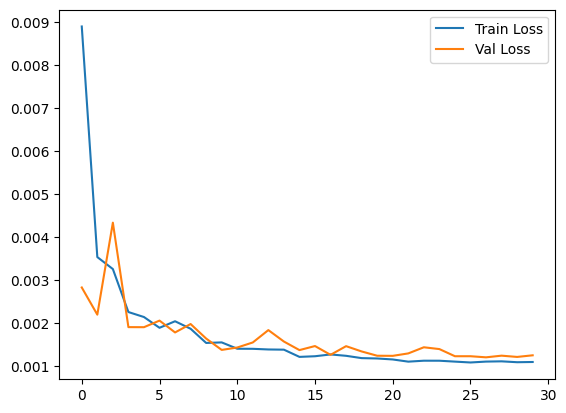

In [59]:
# # Visualize the training process
import matplotlib.pyplot as plt

plt.plot(train_losses_avg, label='Train Loss')
plt.plot(val_losses_avg, label='Val Loss')
plt.legend()
plt.show()


In [ ]:
model.load_state_dict(best_model)
model.eval()
test_losses = []
for X_batch, y_batch in test_loader:
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    with torch.no_grad(), autocast():
        y_pred = model(X_batch)
        mse = loss_fn(y_pred, y_batch.unsqueeze(1))
        test_losses.append(mse.item())

avg_test_loss = sum(test_losses) / len(test_losses)
print(f'Test MSE: {avg_test_loss}')